In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets


iris = datasets.load_iris()
print(np.shape(iris.data))
print(iris.feature_names)
print(iris.target_names)


(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


![picture](https://drive.google.com/uc?export=view&id=1Kh6TMbgT5IsKgLkNeccH4Kp1BhkzU8O3)

In [ ]:
X = iris.data
y = iris.target
n,dx=np.shape(X)
medias = np.mean(X,axis=0)
X0=X-medias

In [ ]:
C=X0.T @ X0/n
ava, ave = np.linalg.eig(C)

j = 0
print(C @ ave[:,j])
print(ava[j] * ave[:,j] )

[-0.0452168   0.04645056  0.00592264  0.04240461]
[-0.0452168   0.04645056  0.00592264  0.04240461]


In [ ]:
print('Procentaje de Energía en cada componente:',ava/np.sum(ava))
print('Autovectores:', ave.T)
for dim in range(1,dx+1):
  U = X0 @ ave[:,:dim]
  Xh = U @ ave[:,:dim].T
  ECM = np.sum((X0-Xh)**2)/n
  print("El ECM para {:d} dimensiones es {:f} ".format(dim,ECM))

Procentaje de Energía en cada componente: [0.92461872 0.05306648 0.01710261 0.00521218]
Autovectores: [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]
El ECM para 1 dimensiones es 0.342417 
El ECM para 2 dimensiones es 0.101364 
El ECM para 3 dimensiones es 0.023676 
El ECM para 4 dimensiones es 0.000000 


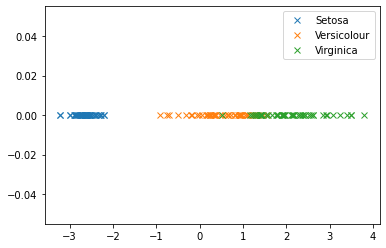

In [ ]:
# 1 DIMENSION
U=X0 @ ave[:,:1]
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
  plt.plot(U[y==label,0],np.zeros_like(U[y==label,0]),'x',label=name)
plt.legend()  
plt.show()  

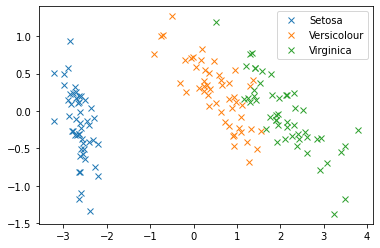

In [ ]:
# 2 DIMENSIONES
U=X0 @ ave[:,:2]
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
  plt.plot(U[y==label,0],U[y==label,1],'x',label=name)
plt.legend()  
plt.show()

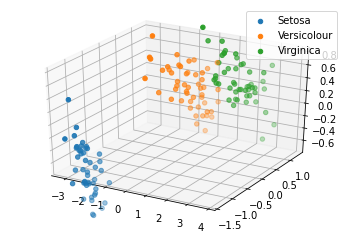

In [ ]:
# 3 DIMENSIONES
U=X0 @ ave[:,:3]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
  ax.scatter(U[y==label,0],U[y==label,1],U[y==label,2],'x',label=name)
plt.legend() 
plt.show()

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)
print('AVES',pca.components_) 
print('AVAS',pca.explained_variance_) 
print('AVAS normalizados',pca.explained_variance_ratio_) 
print('ECM',np.sum((X0-Xh)**2)/n)

AVES [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
AVAS [4.22824171 0.24267075]
AVAS normalizados [0.92461872 0.05306648]
ECM 0.10136429572959302
